# P-Values

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

C:\Users\luetma00\AppData\Local\Temp\ipykernel_5344\2622230225.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### A case of sex discrimination

The following dataset contains data regarding promotion of 48 employees of a bank. 

In [6]:
bank_data = pd.read_csv("sex_discrimination.csv")

We can compute what the promotion rate for men and women:

In [7]:
def compute_promotion_rates(df):
    promoted = df[df["decision"] == "promoted"]
    female = df[df["sex"] == "female"]
    male = df[df["sex"] == "male"]
    promoted_male = promoted[promoted["sex"] == "male"]
    promoted_female = promoted[promoted["sex"] == "female"]
    rate_female = len(promoted_female) / len(female)
    rate_male = len(promoted_male) / len(male)
    return (rate_male, rate_female)

In [10]:
(rate_male, rate_female) = compute_promotion_rates(bank_data)

print("promotion rate for female: ", rate_female)
print("promotion rate for male: ", rate_male)
print("diff: ", rate_male - rate_female)

promotion rate for female:  0.5833333333333334
promotion rate for male:  0.875
diff:  0.29166666666666663


We see that the rate for men was higher than the rate for women. Is this a case of discrimination or could this happen by chance even if the gender would not be taken into account in the decision? Let's simulate:

In [19]:
n_simulations = 2000
n_promoted = 35
diffs = []
for i in range(0, n_simulations):
    # Choose 35 entries (people) randomly for promotion
    idcs = np.random.randint(0, len(bank_data), size=35)

    # Create a new dataset where the selected people are promoted.
    bank_data_sim = bank_data.copy()  
    promotion_decision = bank_data_sim["decision"]
    promotion_decision.iloc[:] = "not promoted"
    promotion_decision.iloc[idcs] = "promoted"
    bank_data_sim["decision"] = promotion_decision

    # compute the rates and store the diffs
    (rate_male, rate_female) = compute_promotion_rates(bank_data_sim)
    diffs.append(rate_male - rate_female)

The histogram reveals that it is rather unlikely to observe such extreme differences:

(array([0.0125, 0.0375, 0.075 , 0.075 , 0.225 , 0.275 , 0.775 , 1.1125,
        1.4375, 2.0625, 2.6625, 2.425 , 2.8625, 2.6   , 2.3   , 1.85  ,
        1.4625, 1.2625, 0.7375, 0.3875, 0.225 , 0.0625, 0.0375, 0.025 ,
        0.0125]),
 array([-0.5 , -0.46, -0.42, -0.38, -0.34, -0.3 , -0.26, -0.22, -0.18,
        -0.14, -0.1 , -0.06, -0.02,  0.02,  0.06,  0.1 ,  0.14,  0.18,
         0.22,  0.26,  0.3 ,  0.34,  0.38,  0.42,  0.46,  0.5 ]),
 <BarContainer object of 25 artists>)

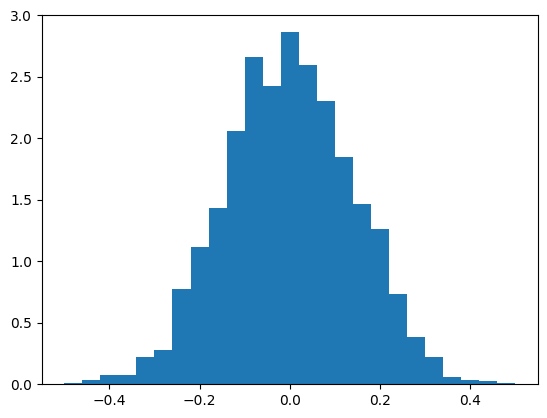

In [22]:
plt.hist(diffs, bins=25, density=True)

We obtain a more precise estimation of the p-value when we collect all events with more extreme outcomes:

In [24]:
sum(1 for diff in diffs if diff > 0.29) / n_simulations

0.03

# Polling example

In the next example we simulate reults of polls and estimate whether we are justified to assume when observing a spread of 0.04 that one candidate has a lead (i.e. that the true mean is different from 0.5). 

Again, we do a simulation:

In [41]:
p = 0.5

bern = stats.bernoulli(p)

N=100
n_sim = 1000

p_ests = []
for i in range(n_sim):
    answers = bern.rvs(N)
    yes_answers = np.sum(answers) 
    p_ests.append(yes_answers / N)


(array([  1.,  11.,  35., 133., 178., 256., 259.,  85.,  31.,  11.]),
 array([0.32 , 0.353, 0.386, 0.419, 0.452, 0.485, 0.518, 0.551, 0.584,
        0.617, 0.65 ]),
 <BarContainer object of 10 artists>)

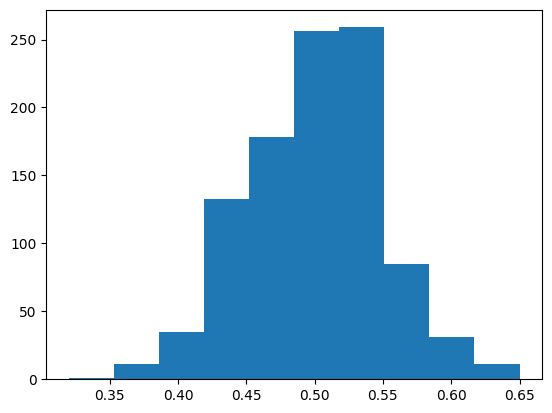

In [42]:
plt.hist(p_ests)

We see that with such a spread, and only 100 participants, such outcomes are rather likely.

In [43]:
num_more_extreme = sum(1 for p_est in p_ests if p_est > 0.52 or p_est < 0.48)
print("p-value: ", num_more_extreme / n_sim)

p-value:  0.604


Using the explicit formula (see slides) we can obtain a similar result:

In [48]:
N=100
t = np.sqrt(N) * 0.02/0.5
norm = stats.norm(0,1)
print("%5.5f" % (1 - (norm.cdf(t) - norm.cdf(-t))))

0.68916


Note that if we make $N$ large, we can obtain a p-value that is as small as we like, while not changing the spread. 